In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df=pd.read_csv(r'Employee promotion recommendation.csv')

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.shape

(54808, 14)

In [6]:
df.count()

employee_id             54808
department              54808
region                  54808
education               52399
gender                  54808
recruitment_channel     54808
no_of_trainings         54808
age                     54808
previous_year_rating    50684
length_of_service       54808
KPIs_met >80%           54808
awards_won?             54808
avg_training_score      54808
is_promoted             54808
dtype: int64

In [7]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [8]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [9]:
#percent missing values
df.isnull().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [10]:
df.drop("employee_id",inplace=True,axis=1)
df.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


<AxesSubplot:xlabel='avg_training_score'>

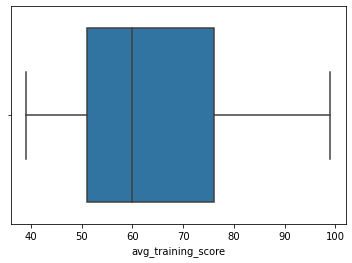

In [11]:
sns.boxplot(x=df['avg_training_score'])

<AxesSubplot:xlabel='no_of_trainings'>

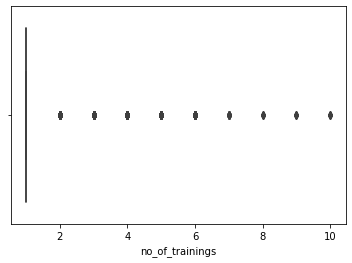

In [12]:
sns.boxplot(x=df['no_of_trainings'])

<AxesSubplot:xlabel='length_of_service'>

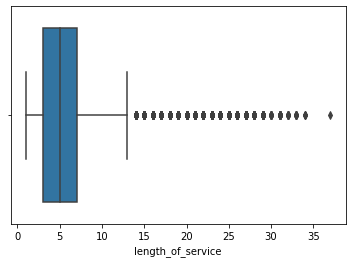

In [13]:
sns.boxplot(x=df['length_of_service'])

<AxesSubplot:xlabel='age'>

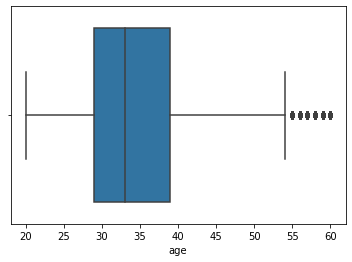

In [14]:
sns.boxplot(x=df['age'])

In [15]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [16]:
data_crosstab=pd.crosstab(df['is_promoted'],df['gender'],margins=False).apply(lambda r: r/r.sum(), axis=1).round(2)
print(data_crosstab)

gender          f     m
is_promoted            
0            0.30  0.70
1            0.31  0.69


In [17]:
data_crosstab=pd.crosstab(df['is_promoted'],df['gender'],margins=False).apply(lambda r: r/r.sum(), axis=0).round(2)
print(data_crosstab)

gender          f     m
is_promoted            
0            0.91  0.92
1            0.09  0.08


In [18]:
data_crosstab=pd.crosstab(df['is_promoted'],df['education'],margins=False).apply(lambda r: r/r.sum(), axis=1).round(2)
print(data_crosstab)

education    Bachelor's  Below Secondary  Master's & above
is_promoted                                               
0                  0.70             0.02              0.28
1                  0.66             0.01              0.32


In [19]:
data_crosstab=pd.crosstab(df['is_promoted'],df['education'],margins=False).apply(lambda r: r/r.sum(), axis=0).round(2)
print(data_crosstab)

education    Bachelor's  Below Secondary  Master's & above
is_promoted                                               
0                  0.92             0.92               0.9
1                  0.08             0.08               0.1


In [20]:
data_crosstab=pd.crosstab(df['is_promoted'],df['department'],margins=False).apply(lambda r: r/r.sum(), axis=1).round(2)
print(data_crosstab)

department   Analytics  Finance    HR  Legal  Operations  Procurement   R&D  \
is_promoted                                                                   
0                 0.10     0.05  0.05   0.02        0.21         0.13  0.02   
1                 0.11     0.04  0.03   0.01        0.22         0.15  0.01   

department   Sales & Marketing  Technology  
is_promoted                                 
0                         0.31        0.13  
1                         0.26        0.16  


In [21]:
data_crosstab=pd.crosstab(df['is_promoted'],df['department'],margins=False).apply(lambda r: r/r.sum(), axis=0).round(2)
print(data_crosstab)

department   Analytics  Finance    HR  Legal  Operations  Procurement   R&D  \
is_promoted                                                                   
0                  0.9     0.92  0.94   0.95        0.91          0.9  0.93   
1                  0.1     0.08  0.06   0.05        0.09          0.1  0.07   

department   Sales & Marketing  Technology  
is_promoted                                 
0                         0.93        0.89  
1                         0.07        0.11  


In [22]:
data_crosstab=pd.crosstab(df['is_promoted'],df['department'],margins=True)
print(data_crosstab)

department   Analytics  Finance    HR  Legal  Operations  Procurement  R&D  \
is_promoted                                                                  
0                 4840     2330  2282    986       10325         6450  930   
1                  512      206   136     53        1023          688   69   
All               5352     2536  2418   1039       11348         7138  999   

department   Sales & Marketing  Technology    All  
is_promoted                                        
0                        15627        6370  50140  
1                         1213         768   4668  
All                      16840        7138  54808  


In [23]:
data_crosstab=pd.crosstab(df['is_promoted'],[df['department'],df['gender']],margins=False).apply(lambda r: r/r.sum(), axis=0).round(2)
print(data_crosstab)

department  Analytics       Finance          HR       Legal       Operations  \
gender              f     m       f     m     f     m     f     m          f   
is_promoted                                                                    
0                0.88  0.91    0.92  0.92  0.94  0.94  0.96  0.95       0.91   
1                0.12  0.09    0.08  0.08  0.06  0.06  0.04  0.05       0.09   

department        Procurement         R&D       Sales & Marketing        \
gender          m           f     m     f     m                 f     m   
is_promoted                                                               
0            0.91        0.88  0.92  0.89  0.93              0.94  0.92   
1            0.09        0.12  0.08  0.11  0.07              0.06  0.08   

department  Technology        
gender               f     m  
is_promoted                   
0                  0.9  0.89  
1                  0.1  0.11  


In [24]:
data_crosstab=pd.crosstab(df['is_promoted'],[df['department'],df['gender']],margins=False).apply(lambda r: r/r.sum(), axis=1).round(2)
print(data_crosstab)

department  Analytics       Finance          HR       Legal       Operations  \
gender              f     m       f     m     f     m     f     m          f   
is_promoted                                                                    
0                0.01  0.09    0.01  0.03  0.02  0.03   0.0  0.02       0.08   
1                0.01  0.10    0.01  0.03  0.01  0.02   0.0  0.01       0.09   

department        Procurement        R&D       Sales & Marketing        \
gender          m           f     m    f     m                 f     m   
is_promoted                                                              
0            0.12        0.06  0.07  0.0  0.02              0.06  0.25   
1            0.12        0.08  0.06  0.0  0.01              0.04  0.22   

department  Technology        
gender               f     m  
is_promoted                   
0                 0.05  0.08  
1                 0.06  0.11  


In [25]:
data_crosstab=pd.crosstab(df['is_promoted'],df['recruitment_channel'],margins=False).apply(lambda r: r/r.sum(), axis=0).round(2)
print(data_crosstab)

recruitment_channel  other  referred  sourcing
is_promoted                                   
0                     0.92      0.88      0.91
1                     0.08      0.12      0.09


In [26]:
data_crosstab=pd.crosstab(df['is_promoted'],df['recruitment_channel'],margins=False).apply(lambda r: r/r.sum(), axis=1).round(2)
print(data_crosstab)

recruitment_channel  other  referred  sourcing
is_promoted                                   
0                     0.56      0.02      0.42
1                     0.55      0.03      0.42


In [27]:
#fill missing value
df["previous_year_rating"]= df["previous_year_rating"].fillna(0)
#change type to int
df["previous_year_rating"]= df["previous_year_rating"].astype("int")
#Find out mode value for education
df["education"].mode()
#fill missing value with mode 
df["education"]= df["education"].fillna("Bachelor's")

In [28]:
df["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

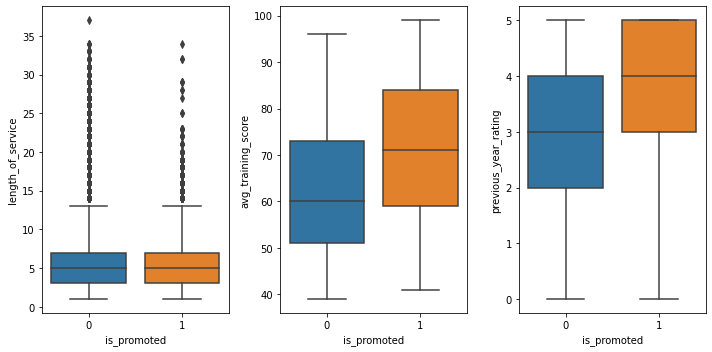

In [29]:
# Visualize relationship between promoted and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
figure_1=sns.boxplot(x=df["is_promoted"],y=df["length_of_service"])
fig.add_subplot(1,3,2)
figure_2=sns.boxplot(x=df["is_promoted"],y=df["avg_training_score"])
fig.add_subplot(1,3,3)
figure_3=sns.boxplot(x=df["is_promoted"],y=df["previous_year_rating"])
plt.tight_layout()
plt.show()

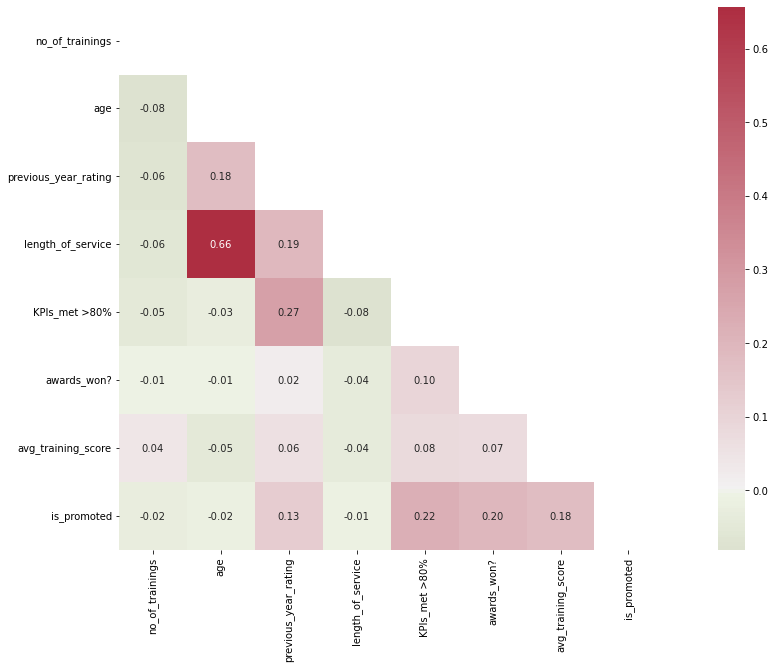

In [30]:
#Correlation heatmaps
plt.figure(figsize=(20, 10))
#sns.heatmap(df1.corr(method='pearson').abs(), annot=True)

# Create a mask
corr=df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)

sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

plt.show();

In [31]:
# one hot encoding
df1=df.copy()
df1["gender"]=df1["gender"].apply(lambda x: 1 if x=="m" else 0)
#list of columns
cols = df1.select_dtypes(["object"]).columns
#Create dummy variables
ds=pd.get_dummies(df1[cols],drop_first=True)
ds
#concat newly created columns with original dataframe
df2=pd.concat([df1,ds],axis=1)
#Drop original columns
df2.drop(cols,axis=1,inplace=True)

In [32]:
df2.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing
0,0,1,35,5,8,1,0,49,0,0,...,0,0,0,1,0,0,0,1,0,1
1,1,1,30,5,4,0,0,60,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,34,3,7,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,2,39,1,10,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,45,3,2,0,0,73,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df2.count()

gender                          54808
no_of_trainings                 54808
age                             54808
previous_year_rating            54808
length_of_service               54808
KPIs_met >80%                   54808
awards_won?                     54808
avg_training_score              54808
department_Finance              54808
department_HR                   54808
department_Legal                54808
department_Operations           54808
department_Procurement          54808
department_R&D                  54808
department_Sales & Marketing    54808
department_Technology           54808
region_region_10                54808
region_region_11                54808
region_region_12                54808
region_region_13                54808
region_region_14                54808
region_region_15                54808
region_region_16                54808
region_region_17                54808
region_region_18                54808
region_region_19                54808
region_regio

In [33]:
from sklearn.model_selection import train_test_split
#split data into dependent variables(X) and independent variable(y) that we would predict
y = df2.pop("is_promoted")
X = df2
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (43846, 53)
train size y :  (43846,)
test size X :  (10962, 53)
test size y :  (10962,)


In [34]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [35]:
#check for distribution of labels
y_train.value_counts(normalize=True)

0    0.914245
1    0.085755
Name: is_promoted, dtype: float64

In [79]:
df3=df2.copy()
#df3=df3.drop(['is_promoted'],axis=1)
column_head=list(df3.columns)
column_head

['gender',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'department_Finance',
 'department_HR',
 'department_Legal',
 'department_Operations',
 'department_Procurement',
 'department_R&D',
 'department_Sales & Marketing',
 'department_Technology',
 'region_region_10',
 'region_region_11',
 'region_region_12',
 'region_region_13',
 'region_region_14',
 'region_region_15',
 'region_region_16',
 'region_region_17',
 'region_region_18',
 'region_region_19',
 'region_region_2',
 'region_region_20',
 'region_region_21',
 'region_region_22',
 'region_region_23',
 'region_region_24',
 'region_region_25',
 'region_region_26',
 'region_region_27',
 'region_region_28',
 'region_region_29',
 'region_region_3',
 'region_region_30',
 'region_region_31',
 'region_region_32',
 'region_region_33',
 'region_region_34',
 'region_region_4',
 'region_region_5',
 'region_region_6',
 'region_region_7',
 'region_region_8',

## Logistic regression without considering Class weight

In [80]:
#using statsmodel - but it does not consider class weights as of now but we can run glm with some specifications in order to consider class weights
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary(xname=column_head))

Optimization terminated successfully.
         Current function value: 0.644074
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            is_promoted   No. Observations:                43846
Model:                          Logit   Df Residuals:                    43793
Method:                           MLE   Df Model:                           52
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                  -1.201
Time:                        17:06:00   Log-Likelihood:                -28240.
converged:                       True   LL-Null:                       -12830.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
gender                           0.0101      0.011      0.945      0.344

*We use z-test in logistic regression to evaluate the significance of individual variables because for a binomial outcome the variance depends on the mean and not the residuals, so you don't have to estimate any extra parameters. 

In [84]:
y_pred = log_reg.predict(X_test)
y_pred

array([0.31489872, 0.46515985, 0.5842378 , ..., 0.60539168, 0.4097042 ,
       0.57840153])

In [92]:
from sklearn.metrics import confusion_matrix
threshold = 0.2
y_pred1 = (y_pred > threshold).astype('float')
confusion_matrix(y_test, y_pred1)

array([[  89, 9965],
       [   0,  908]], dtype=int64)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02     10054
           1       0.08      1.00      0.15       908

    accuracy                           0.09     10962
   macro avg       0.54      0.50      0.09     10962
weighted avg       0.92      0.09      0.03     10962



## Logistic Regression considering Class weights

In [37]:
from sklearn.linear_model import LogisticRegression
#make instance of model with default parameters except class weight as we will add class weights due to class imbalance problem
lr_basemodel =LogisticRegression(class_weight={0:0.1,1:0.9})
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9})

In [38]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
#Hyperparameter tuning
# define model/create instance
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="f1",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15000 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                      

In [39]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.4484143106034219
Best hyperparameters:  {'C': 20, 'class_weight': {0: 0.27180360721442887, 1: 0.7281963927855711}, 'penalty': 'l2'}


In [40]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0:0.27,1:0.73},C=20,penalty="l2")
lr2.fit(X_train,y_train)

LogisticRegression(C=20, class_weight={0: 0.27, 1: 0.73})

In [41]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr2.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix
# create confusion matrix
cm = pd.crosstab(y_test, y_pred_test,rownames=['Actual'],colnames=['Predicted'],margins=False)
cm

Predicted,0,1
Actual,,
0,9577,477
1,518,390


In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# ROC- AUC score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  ", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  ", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  ", f1_score(y_test,y_pred_test))

ROC-AUC score  test dataset:   0.8801395372477607
precision score  test dataset:   0.44982698961937717
Recall score  test dataset:   0.42951541850220265
f1 score  test dataset :   0.4394366197183099


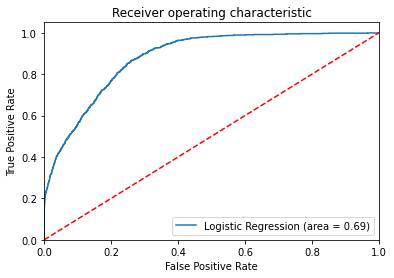

In [49]:
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<AxesSubplot:title={'center':'Feature Importance'}>

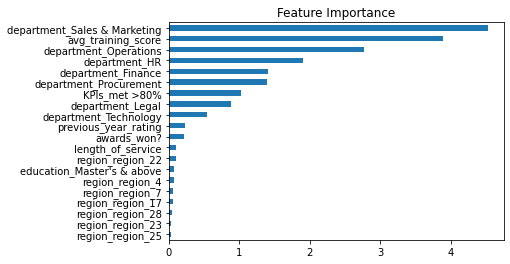

In [71]:
importance = lr2.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance,index=X.columns)
feat_importances.nlargest(20).sort_values().plot(kind='barh',title = 'Feature Importance')

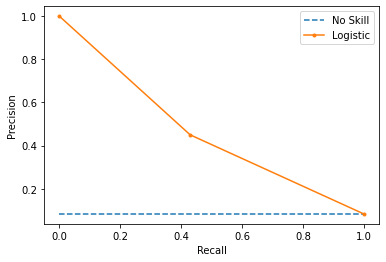

In [73]:
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr2.predict(X_test))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [83]:
#Marginal effects for statsmodel
print(log_reg.get_margeff().summary())

        Logit Marginal Effects       
Dep. Variable:            is_promoted
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0023      0.002      0.945      0.344      -0.002       0.007
x2            -0.0044      0.002     -1.895      0.058      -0.009       0.000
x3            -0.0129      0.003     -3.836      0.000      -0.019      -0.006
x4             0.0153      0.002      6.201      0.000       0.010       0.020
x5             0.0060      0.003      1.942      0.052   -5.66e-05       0.012
x6             0.0520      0.002     21.828      0.000       0.047       0.057
x7             0.0464      0.003     15.118      0.000       0.040       0.052
x8             0.5064      0.009     53.452      0.000       0.488       0.525
x9             0.1945      0.005     41.985      0.000    